In [2]:
import pandas as pd
df = pd.read_csv('/content/GlobalWeatherRepository (1).csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


1. Data Cleaning & Preprocessing:

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('/content/GlobalWeatherRepository (1).csv')

# 2. Handle missing values
# a. Check for missing values
print(df.isnull().sum())



country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [6]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())



In [7]:

# 4. Normalize data (optional, but often recommended for models)
# a. Select numerical features for normalization
numerical_features = ['latitude', 'longitude', 'moon_illumination']  # Replace with your actual features



In [8]:
# b. Create a StandardScaler object
scaler = StandardScaler()

In [9]:
# 1. Print the available columns to inspect their names
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [10]:
# 3. Now proceed with scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

**Exploratory Data Analysis (EDA)**


       temperature_celsius     precip_mm
count         58658.000000  58658.000000
mean             22.215943      0.141110
std               9.632845      0.611268
min             -24.900000      0.000000
25%              17.000000      0.000000
50%              25.000000      0.000000
75%              28.500000      0.030000
max              49.200000     42.240000


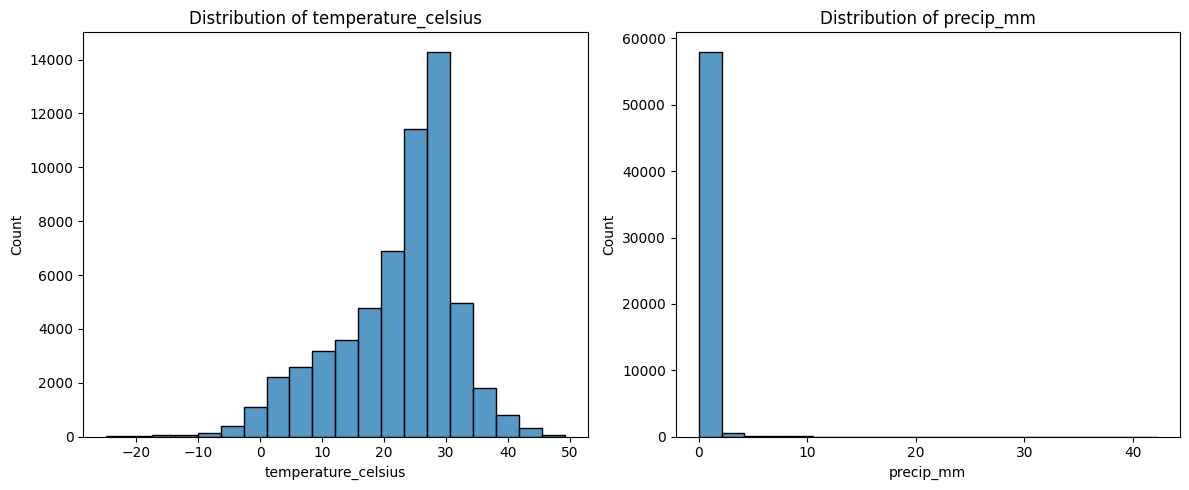

In [11]:
!pip install matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/content/GlobalWeatherRepository (1).csv')

# 2. Handle missing values (as before)
# ... (Your code for handling missing values) ...

# 3. Basic EDA and Visualizations

# a. Descriptive Statistics
print(df[['temperature_celsius', 'precip_mm']].describe())

# b. Histograms for Temperature and Precipitation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['temperature_celsius'], bins=20)
plt.title('Distribution of temperature_celsius')
plt.xlabel('temperature_celsius')

plt.subplot(1, 2, 2)
sns.histplot(df['precip_mm'], bins=20)
plt.title('Distribution of precip_mm')
plt.xlabel('precip_mm')

plt.tight_layout()
plt.show()



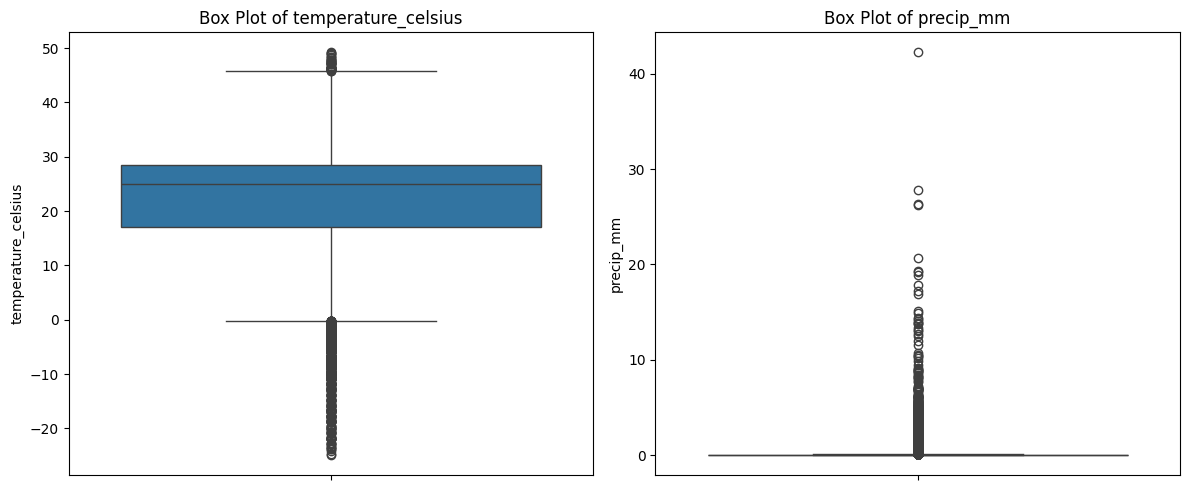

In [12]:
# c. Box Plots for Temperature and Precipitation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['temperature_celsius'])
plt.title('Box Plot of temperature_celsius')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['precip_mm'])
plt.title('Box Plot of precip_mm')

plt.tight_layout()
plt.show()



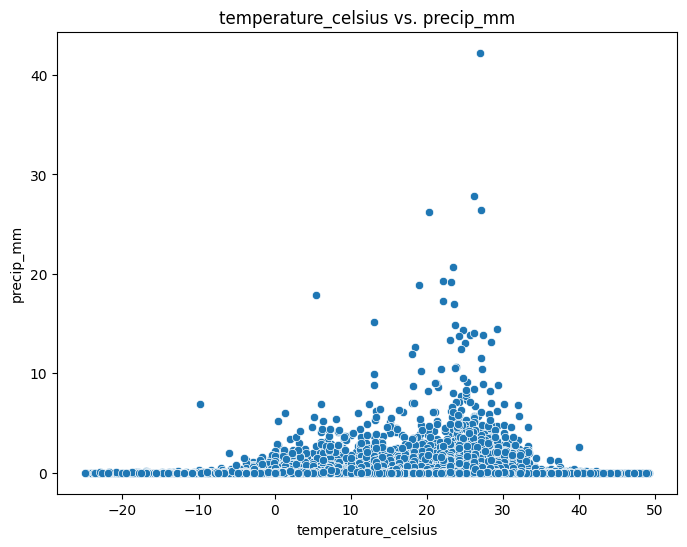

                     temperature_celsius  precip_mm
temperature_celsius             1.000000   0.020177
precip_mm                       0.020177   1.000000


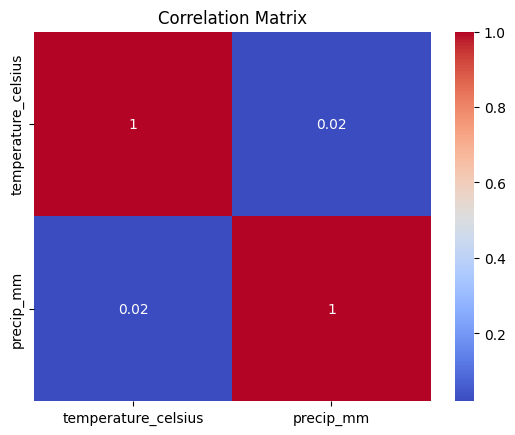

In [13]:
# d. Scatter Plot (Temperature vs. Precipitation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='precip_mm', data=df)
plt.title('temperature_celsius vs. precip_mm')
plt.xlabel('temperature_celsius')
plt.ylabel('precip_mm')
plt.show()

# e. Correlation Matrix
correlation_matrix = df[['temperature_celsius', 'precip_mm']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Model Building**

In [14]:
!pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load the dataset
df = pd.read_csv('/content/GlobalWeatherRepository (1).csv')

# 2. Data Preprocessing


# 3. Feature Engineering and Selection
# Assuming 'lastupdated' is a datetime column, convert it to numerical representation
df['last_updated'] = pd.to_datetime(df['last_updated'])  # Ensure 'lastupdated' is datetime
df['lastupdated_numeric'] = df['last_updated'].astype(np.int64) // 10**9  # Convert to Unix timestamp

# Select features and target variable
features = ['lastupdated_numeric']
target = 'temperature_celsius'  # Replace with the column you want to forecast



In [15]:
# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42
)

# 5. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 80.53736319003835
Root Mean Squared Error (RMSE): 8.974261150091317
Mean Absolute Error (MAE): 7.180095725409866
R-squared (R2): 0.12898618997595668


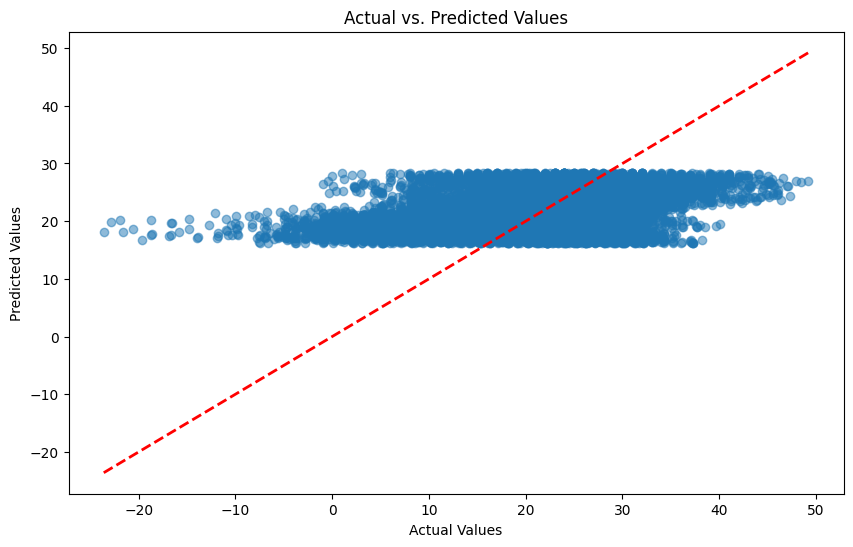

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ... (Your existing code for data loading, preprocessing, model training, and evaluation) ...


# 7. Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Advanced Assessment
**Advanced EDA**


In [17]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# 1. Load and preprocess your data (as before)
# ... (Your code for loading, handling missing values, etc.) ...

# 2. Select relevant features for anomaly detection
# Choose the columns you want to use for anomaly detection
# For example:
features_for_anomaly_detection = ['temperature_celsius', 'precip_mm', 'wind_mph']

# 3. Create and train the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)  # You can adjust 'contamination'
model.fit(df[features_for_anomaly_detection])

# 4. Get anomaly scores and predictions
df['anomaly_score'] = model.decision_function(df[features_for_anomaly_detection])
df['anomaly'] = model.predict(df[features_for_anomaly_detection])

# 5. Analyze the results
# a. Filter for anomalies
anomalies = df[df['anomaly'] == -1]  # Anomalies are labeled -1

# b. Explore the anomalies
print(anomalies.head())  # Print some of the anomalies
print(anomalies.describe())  # Get descriptive statistics of anomalies


        country     location_name  latitude  longitude            timezone  \
3       Andorra  Andorra La Vella     42.50       1.52      Europe/Andorra   
76      Iceland         Grindavik     63.83     -22.43  Atlantic/Reykjavik   
77        India         New Delhi     28.60      77.20        Asia/Kolkata   
100  Luxembourg        Luxembourg     49.61       6.13   Europe/Luxembourg   
103    Malaysia      Kuala Lumpur      3.17     101.70   Asia/Kuala_Lumpur   

     last_updated_epoch        last_updated  temperature_celsius  \
3            1715849100 2024-05-16 10:45:00                  6.3   
76           1715849100 2024-05-16 08:45:00                  7.0   
77           1715849100 2024-05-16 14:15:00                 42.0   
100          1715849100 2024-05-16 10:45:00                 14.0   
103          1715849100 2024-05-16 16:45:00                 29.0   

     temperature_fahrenheit condition_text  ...  air_quality_gb-defra-index  \
3                      43.3  Light drizzle 

# Forecasting with Multiple **Models**

In [18]:
!pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load and preprocess your data (as before)
# ... (Your code for loading, handling missing values, etc.) ...

# 2. Feature engineering (as before)
# ... (Your code for creating 'lastupdated_numeric', etc.) ...

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['lastupdated_numeric']], df['temperature_celsius'], test_size=0.2, random_state=42
)

# 4. Define and train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2: {r2:.4f}")
    print("-" * 20)


Model: Linear Regression
  MSE: 80.5374
  RMSE: 8.9743
  MAE: 7.1801
  R2: 0.1290
--------------------
Model: Decision Tree
  MSE: 82.8274
  RMSE: 9.1010
  MAE: 6.8660
  R2: 0.1042
--------------------
Model: Random Forest
  MSE: 79.1046
  RMSE: 8.8941
  MAE: 6.7517
  R2: 0.1445
--------------------


In [19]:
# ... (Continuing from the previous code) ...

# 5. Create an ensemble (averaging predictions)
ensemble_predictions = np.mean([model.predict(X_test) for model in models.values()], axis=0)

# 6. Evaluate the ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test, ensemble_predictions)
r2_ensemble = r2_score(y_test, ensemble_predictions)

print("Ensemble Model")
print(f"  MSE: {mse_ensemble:.4f}")
print(f"  RMSE: {rmse_ensemble:.4f}")
print(f"  MAE: {mae_ensemble:.4f}")
print(f"  R2: {r2_ensemble:.4f}")

Ensemble Model
  MSE: 75.0844
  RMSE: 8.6651
  MAE: 6.7202
  R2: 0.1880


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/GlobalWeatherRepository.csv')

# Now you can work with the DataFrame 'df'
print(df.head())  # Print the first few rows of the DataFrame
# ... (rest of your code) ...

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

# **Unique Analyses**

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [21]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('/content/GlobalWeatherRepository (1).csv')

# 2. Preprocessing
# a. Handle missing values (if any)
# ... (Your code for handling missing values, e.g., imputation or removal) ...

# b. Convert 'lastupdated' to datetime if needed
df['last_updated'] = pd.to_datetime(df['last_updated'])

# c. Extract year from 'lastupdated'
df['year'] = df['last_updated'].dt.year

# 3. Grouping by region and year
# Assuming 'country' column represents the region
df_grouped = df.groupby(['country', 'year'])[['temperature_celsius', 'precip_mm']].mean().reset_index()

# Now you can work with the grouped DataFrame 'df_grouped'
print(df_grouped.head())


       country  year  temperature_celsius  precip_mm
0  Afghanistan  2024            22.696943   0.038603
1  Afghanistan  2025             4.149315   0.054110
2      Albania  2024            25.022271   0.169651
3      Albania  2025            13.612329   0.072055
4      Algeria  2024            25.154386   0.025351


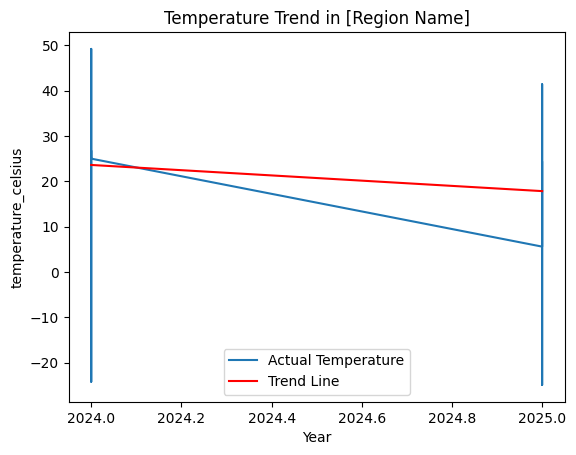

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ... (Load and preprocess your data, group by region and year if necessary) ...

# Assuming 'df_region' contains data for a specific region
X = df['year'].values.reshape(-1, 1)  # Year as feature
y = df['temperature_celsius'].values  # Temperature as target

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)

plt.plot(df['year'], df['temperature_celsius'], label='Actual Temperature')
plt.plot(df['year'], trend, label='Trend Line', color='red')
plt.xlabel('Year')
plt.ylabel('temperature_celsius')
plt.title('Temperature Trend in [Region Name]')
plt.legend()
plt.show()

                        cloud  temperature_celsius  precip_mm  humidity
cloud                1.000000            -0.176674   0.214313  0.555168
temperature_celsius -0.176674             1.000000   0.020177 -0.349544
precip_mm            0.214313             0.020177   1.000000  0.183625
humidity             0.555168            -0.349544   0.183625  1.000000


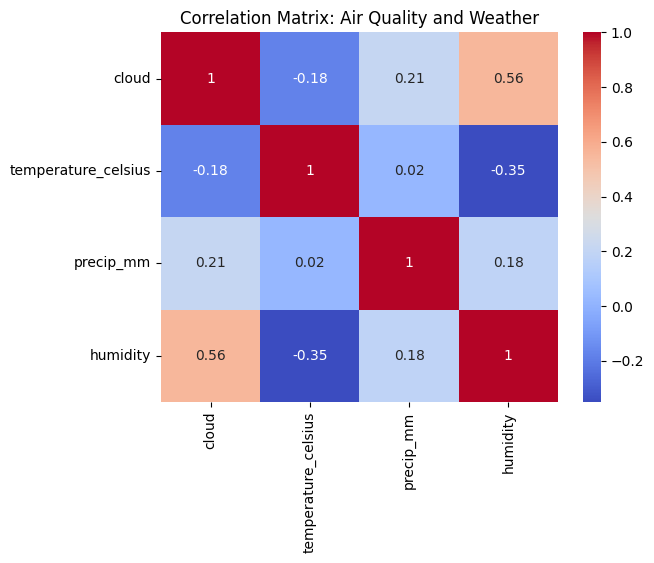

In [23]:
# Assuming 'df' contains both air quality and weather data
correlation_matrix = df[['cloud', 'temperature_celsius', 'precip_mm', 'humidity']].corr()
print(correlation_matrix)

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Air Quality and Weather')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['temperature_celsius', 'precip_mm', 'humidity']]
y = df['cloud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
# ... (Calculate evaluation metrics like MSE, R-squared, etc.) ...

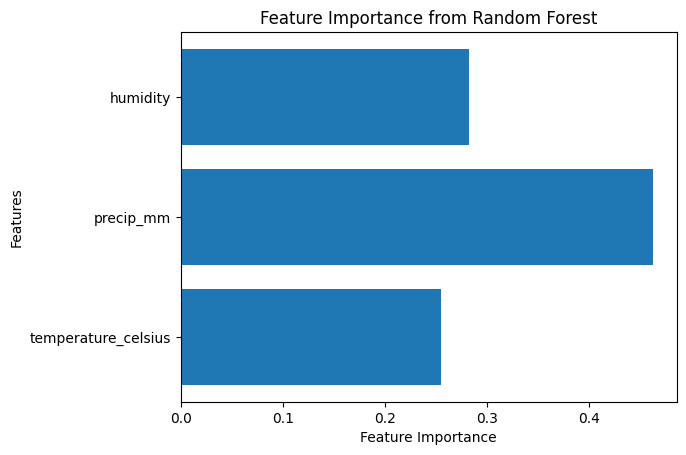

In [25]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ... (Load and preprocess your data, split into training and testing sets) ...

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Visualize feature importances
features = X_train.columns
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

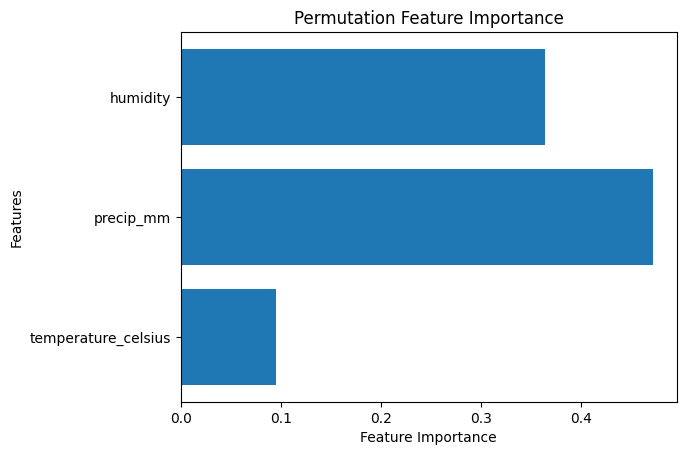

In [28]:
from sklearn.inspection import permutation_importance

# ... (Train your model) ...

# Calculate permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances
importances = result.importances_mean

# Visualize feature importances
features = X_test.columns
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()

In [29]:
from sklearn.feature_selection import RFE

# ... (Train your model) ...

# Create an RFE object
selector = RFE(model, n_features_to_select=5, step=1)  # Select 5 features

# Fit RFE to the data
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
print(selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(


Index(['temperature_celsius', 'precip_mm', 'humidity'], dtype='object')


In [30]:
!pip install geopandas shapely matplotlib
import geopandas as gpd
import shapely.geometry as geom
import matplotlib.pyplot as plt

In [31]:
# Assuming 'df' is your pandas DataFrame with 'latitude' and 'longitude' columns
geometry = [geom.Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

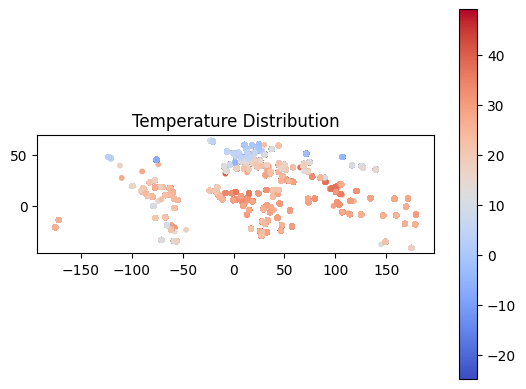

In [32]:
gdf.plot(column='temperature_celsius', cmap='coolwarm', legend=True, markersize=10)
plt.title('Temperature Distribution')
plt.show()

In [33]:
# Assuming 'df' is your DataFrame with 'country' and 'continent' columns
df_grouped = df.groupby(['year', 'country'])[['temperature_celsius', 'precip_mm']].mean().reset_index()

In [34]:
# Calculate mean temperature for each country
country_temp_means = df_grouped.groupby('country')['temperature_celsius'].mean()
print(country_temp_means)

country
Afghanistan    13.423129
Albania        19.317300
Algeria        20.467604
Andorra         8.293934
Angola         27.819274
                 ...    
Гватемала      15.900000
Польша         24.200000
Турция         34.000000
كولومبيا       23.100000
火鸡             29.700000
Name: temperature_celsius, Length: 210, dtype: float64


In [35]:
from scipy import stats

# Compare temperature between two countries
country1_temp = df[df['country'] == 'United states']['temperature_celsius']
country2_temp = df[df['country'] == 'Canada']['temperature_celsius']
t_statistic, p_value = stats.ttest_ind(country1_temp, country2_temp)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: nan, P-value: nan


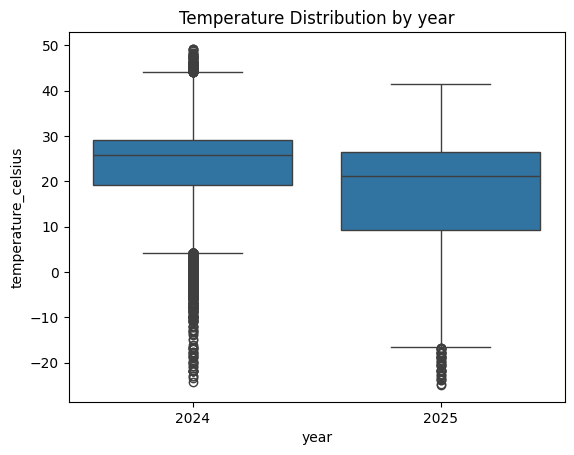

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='year', y='temperature_celsius', data=df)
plt.title('Temperature Distribution by year')
plt.show()

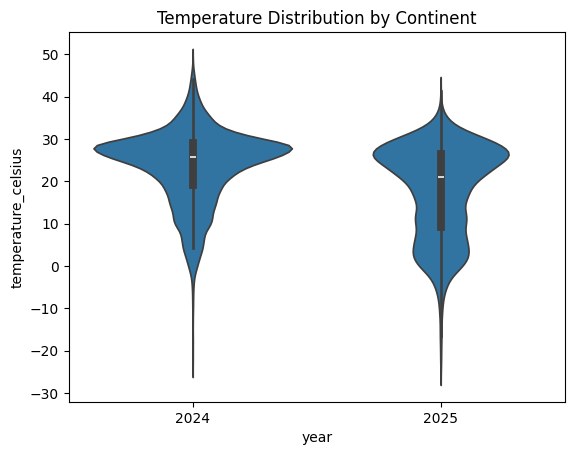

In [37]:
sns.violinplot(x='year', y='temperature_celsius', data=df)
plt.title('Temperature Distribution by Continent')
plt.show()